In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from datasets import load_dataset, Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("dataset_full_big3.csv")

In [3]:
df

,Unnamed: 0,code,alzheimer,age,education_x,ws_big_big3_pauses,ws_big_big3_pauses_long,ws_big_big3_pauses_short,ws_big_big3_uniquewords,ws_big_big3_uniquewordsnorm,...,big3,big3_2,big3_pauses,big3_tags,big3_lema,big3_2_tags,big3_pauses_tags,big3_first_tag,big3_2_first_tag,big3_pauses_first_tag
0,0,3fiigiv401,0,52,2,25,17,8,81,81,...,a muž v kuchyni varí a má aj pomocníka ten doč...,a muž v kuchyni varí a má aj pomocníka [spk] [...,[LONGSIL] a muž v kuchyni varí a má aj pomocní...,O SSms1 Eu6 SSfs6 VKesc+ O VKesc+ T SSms4 PFm...,a|s muž v kuchyňa variť a|s mať aj pomocník t...,O SSms1 Eu6 SSfs6 VKesc+ O VKesc+ T SSms4 xsp...,xlongsilx O SSms1 Eu6 SSfs6 VKesc+ O VKesc+ T...,OOOO SSSS EEEE SSSS VVVV OOOO VVVV TTTT SSSS ...,OOOO SSSS EEEE SSSS VVVV OOOO VVVV TTTT SSSS ...,xlongsilx OOOO SSSS EEEE SSSS VVVV OOOO VVVV ...
1,1,ysw9a5m701,0,66,2,23,9,14,97,97,...,a ja aj toto je toto je by mohol nevie dal ale...,a ja aj toto je toto je by mohol nevie dal ale...,[LONGSIL] a ja aj toto je toto je by [SHORTSIL...,O PPhs1 T PFns1 VKesc+ PFns1 VKesc+ Y VLesci+...,a|s ja aj toto byť|jesť toto byť|jesť by môcť...,O PPhs1 T PFns1 VKesc+ PFns1 VKesc+ Y VLesci+...,xlongsilx O PPhs1 T PFns1 VKesc+ PFns1 VKesc+...,OOOO PPPP TTTT PPPP VVVV PPPP VVVV YYYY VVVV ...,OOOO PPPP TTTT PPPP VVVV PPPP VVVV YYYY VVVV ...,xlongsilx OOOO PPPP TTTT PPPP VVVV PPPP VVVV ...
2,2,lpvvez2301,2,70,2,17,5,12,63,63,...,niekto tam buchol do tej do toho lustra dieťa ...,niekto tam buchol do tej [fil] do toho lustra ...,[LONGSIL] niekto tam buchol do tej [fil] do to...,PFms1 PD VLdscm+ Eu2 PFfs2 Eu2 PFis2 SSis2 SS...,niekto tam buchnúť do tá do ten luster dieťa ...,PFms1 PD VLdscm+ Eu2 PFfs2 xfilx Eu2 PFis2 SS...,xlongsilx PFms1 PD VLdscm+ Eu2 PFfs2 xfilx Eu...,PPPP PPPP VVVV EEEE PPPP EEEE PPPP SSSS SSSS ...,PPPP PPPP VVVV EEEE PPPP xfilx EEEE PPPP SSSS...,xlongsilx PPPP PPPP VVVV EEEE PPPP xfilx EEEE...
3,3,lpvvweke01,0,71,3,24,17,7,39,39,...,kuchyňa otec so synom chlapec sa snaží pomôcť ...,kuchyňa otec so synom chlapec sa snaží pomôcť ...,[LONGSIL] kuchyňa [LONGSIL] otec so synom [LON...,SSfs1 SSms1 Ev7 SSms7 SSms1 R VKesc+ VId+ SSm...,kuchyňa otec s syn chlapec sa snažiť pomôcť o...,SSfs1 SSms1 Ev7 SSms7 SSms1 R VKesc+ VId+ SSm...,xlongsilx SSfs1 xlongsilx SSms1 Ev7 SSms7 xlo...,SSSS SSSS EEEE SSSS SSSS RRRR VVVV VVVV SSSS ...,SSSS SSSS EEEE SSSS SSSS RRRR VVVV VVVV SSSS ...,xlongsilx SSSS xlongsilx SSSS EEEE SSSS xlong...
4,4,fgl9b8ym01,0,87,2,35,14,21,62,62,...,že no červený manžel no tak najsamprv malý zle...,že no červený manžel [@] no tak najsamprv malý...,[LONGSIL] že [SHORTSIL] no [SHORTSIL] červený ...,O O AAms1x SSms1 O T Dx AAis1x Dx VLdscm+ Eu4...,že no červený manžel no tak najsamprv malý zl...,O O AAms1x SSms1 xzavx O PD Dx AAis1x Dx VLds...,xlongsilx O xshortsilx xshortsilx AAms1x SSms...,OOOO OOOO AAAA SSSS OOOO TTTT DDDD AAAA DDDD ...,OOOO OOOO AAAA SSSS xzavx OOOO PPPP DDDD AAAA...,xlongsilx OOOO xshortsilx xshortsilx AAAA SSS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,827,tbc5xe1q01,0,62,1,23,16,7,51,51,...,no tak dobre chlapček stojí na stoličke naťahu...,no tak dobre chlapček stojí na stoličke naťahu...,[LONGSIL] no tak dobre chlapček stojí na stoli...,O PD Dx SSms1 VKesc+ Eu6 SSfs6 VKesc+ R Eu7 S...,no tak dobre chlapček stáť na stolička naťaho...,O PD Dx SSms1 VKesc+ Eu6 SSfs6 VKesc+ R Eu7 S...,xlongsilx O PD Dx SSms1 VKesc+ Eu6 SSfs6 VKes...,OOOO PPPP DDDD SSSS VVVV EEEE SSSS VVVV RRRR ...,OOOO PPPP DDDD SSSS VVVV EEEE SSSS VVVV RRRR ...,xlongsilx OOOO PPPP DDDD SSSS VVVV EEEE SSSS ...
766,828,lpvve13n01,2,71,3,15,11,4,33,33,...,v kuchyni je och otec asi zo synov ktorých zre...,[fil] v kuchyni [fil] je och [@] otec asi zo s...,[LONGSIL] [fil] v kuchyni [LONGSIL] [fil] je o...,Eu6 SSfs6 VKesc+ J SSms1 T Ev2 SSmp2 PAfp2 T ...,v kuchyňa byť|jesť och otec asi z syn ktorý z...,xfilx Eu6 SSfs6 xfilx VKesc+ J xzavx SSms1 T ...,xlongsilx xfilx Eu6 SSfs6 xlongsilx xfilx VKe...,EEEE SSSS VVVV JJJJ SSSS 

# Les - MOCA

In [4]:
X = df[['moca']]
y = df['alzheimer']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [7]:
y_pred = clf.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Presnosť modelu: {accuracy:.2f}')
print('')
print(classification_report(y_test, y_pred))

Presnosť modelu: 0.84

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       132
           1       0.21      0.50      0.29        10
           2       0.92      0.92      0.92        12

    accuracy                           0.84       154
   macro avg       0.70      0.76      0.71       154
weighted avg       0.91      0.84      0.87       154



# Les - Viac

In [9]:
X = df[['moca', 'age', 'education_x', 'ws_big_big3_pauses', 'ws_big_big3_pauses_long', 'ws_big_big3_pauses_short', 'big3_asr_speech_rate_words_per_second']]
y = df['alzheimer']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Presnosť modelu: {accuracy:.2f}')
print('')
print(classification_report(y_test, y_pred))

Presnosť modelu: 0.91

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       129
           1       0.80      0.29      0.42        14
           2       0.88      0.64      0.74        11

    accuracy                           0.91       154
   macro avg       0.86      0.64      0.70       154
weighted avg       0.90      0.91      0.89       154



# Jeden strom - MOCA

In [14]:
X = df[['moca']]
y = df['alzheimer']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

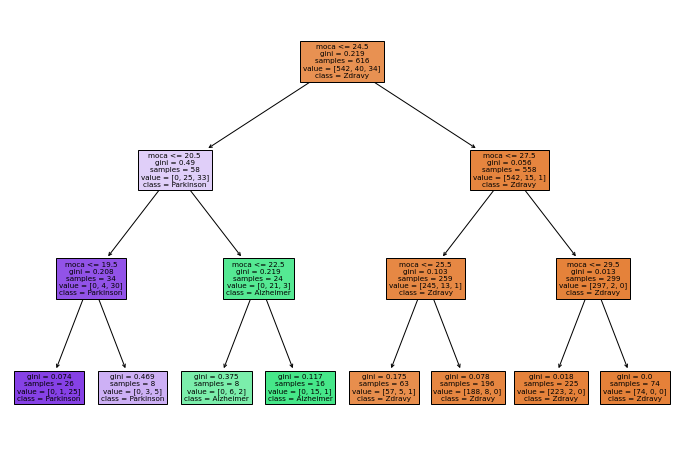

In [17]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['moca'], class_names=['Zdravy', 'Alzheimer', 'Parkinson'], filled=True)
plt.show()

In [18]:
y_pred = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Presnosť modelu: {accuracy:.2f}')
print('')
print(classification_report(y_test, y_pred))

Presnosť modelu: 0.96

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       135
           1       0.88      0.58      0.70        12
           2       0.86      0.86      0.86         7

    accuracy                           0.96       154
   macro avg       0.90      0.81      0.85       154
weighted avg       0.96      0.96      0.96       154



# Jeden strom - Viac

In [20]:
X = df[['moca', 'age', 'education_x', 'ws_big_big3_pauses', 'ws_big_big3_pauses_long', 'ws_big_big3_pauses_short', 'big3_asr_speech_rate_words_per_second']]
y = df['alzheimer']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Presnosť modelu: {accuracy:.2f}')
print('')
print(classification_report(y_test, y_pred))

Presnosť modelu: 0.94

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       133
           1       0.57      0.67      0.62        12
           2       1.00      0.56      0.71         9

    accuracy                           0.94       154
   macro avg       0.85      0.74      0.77       154
weighted avg       0.94      0.94      0.93       154



In [25]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

In [26]:
false_positives = np.sum(cm, axis=0) - np.diag(cm)
false_negatives = np.sum(cm, axis=1) - np.diag(cm)
true_positives = np.diag(cm)
true_negatives = np.sum(cm) - (false_positives + false_negatives + true_positives)

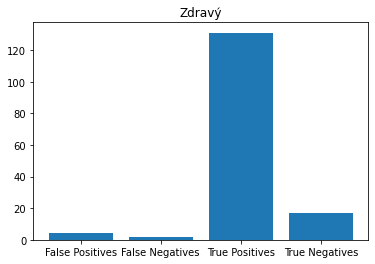

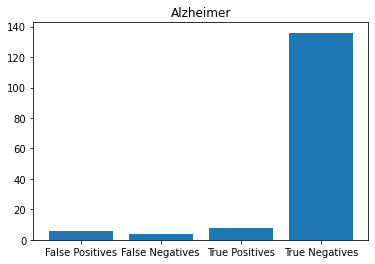

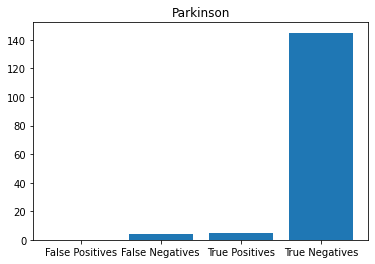

In [27]:
labels = ['False Positives', 'False Negatives', 'True Positives', 'True Negatives']

for i, class_name in enumerate(['Zdravý', 'Alzheimer', 'Parkinson']):
    values = [false_positives[i], false_negatives[i], true_positives[i], true_negatives[i]]
    
    plt.figure(figsize=(6, 4))
    plt.bar(labels, values)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(f"{class_name}")
    plt.show()

# Jeden strom - PauzaD

In [28]:
X = df[['ws_big_big3_pauses_long']]
y = df['alzheimer']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
clf = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

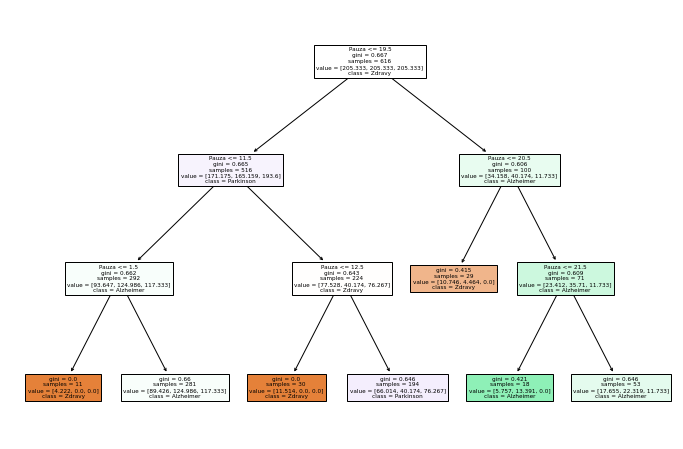

In [31]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Pauza'], class_names=['Zdravy', 'Alzheimer', 'Parkinson'], filled=True)
plt.show()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Presnosť modelu: {accuracy:.2f}')
print('')
print(classification_report(y_test, y_pred))

Presnosť modelu: 0.16

              precision    recall  f1-score   support

           0       1.00      0.11      0.19       142
           1       0.07      1.00      0.13         6
           2       0.06      0.50      0.10         6

    accuracy                           0.16       154
   macro avg       0.38      0.54      0.14       154
weighted avg       0.93      0.16      0.19       154



In [34]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

In [35]:
false_positives = np.sum(cm, axis=0) - np.diag(cm)
false_negatives = np.sum(cm, axis=1) - np.diag(cm)
true_positives = np.diag(cm)
true_negatives = np.sum(cm) - (false_positives + false_negatives + true_positives)

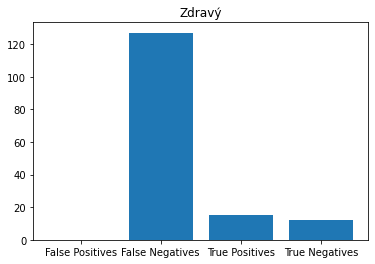

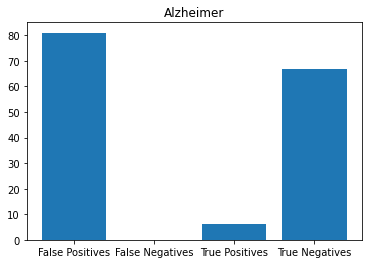

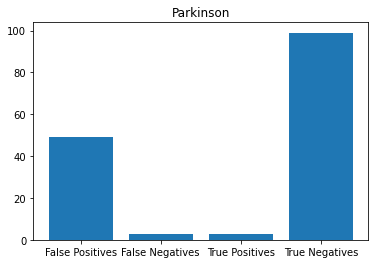

In [36]:
labels = ['False Positives', 'False Negatives', 'True Positives', 'True Negatives']

for i, class_name in enumerate(['Zdravý', 'Alzheimer', 'Parkinson']):
    values = [false_positives[i], false_negatives[i], true_positives[i], true_negatives[i]]
    
    plt.figure(figsize=(6, 4))
    plt.bar(labels, values)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(f"{class_name}")
    plt.show()